<a href="https://colab.research.google.com/github/pranavrao87/Machine-Learning/blob/main/Neural%20Network%20Regression/01_neural_network_regression_w__tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression w/ neural networks in Tensorflow

Regression problem - predicting a numerical variable based on combination of inputs, essentially predicting a number

In [2]:
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to view and fit

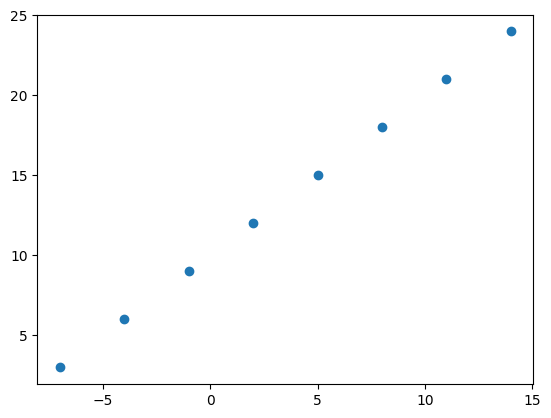

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (input data)
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize
plt.scatter(X, y)

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [5]:
# Create demo tensor for hosuing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
X[1], y[1]

(-4.0, 6.0)

In [8]:
input_shape = X[0].shape # --> X[0] is a scalar!
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
# Turn NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

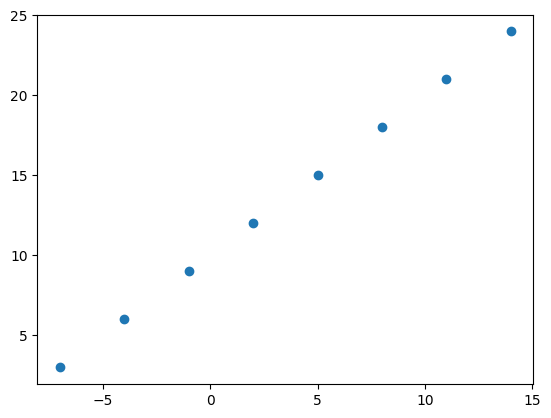

In [11]:
plt.scatter(X, y)

## Steps in modelling w/ TensorFlow

1.   **Creating a model** - define input and output layers, as well as the hidden layers of deep learning model.
2.   **Compiling a model** - define loss function (function which tells model how wrong it is) and the optimizer (tells model how to improve the patterns model is learning) and evaluation metrics (what to use to interpret the performance of model)
3.    **Fitting model** - letting model try to find patterns b/w X and y (features and labels)



In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Creating a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #SGD - Stochastic gradient descent
              metrics=["mae"])

# 3. Fit model
model.fit(tf.expand_dims(X, -1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 20.2294 - mae: 20.2294
Epoch 2/5
1/1 [==============================] - 0s 20ms/step - loss: 19.9481 - mae: 19.9481
Epoch 3/5
1/1 [==============================] - 0s 29ms/step - loss: 19.6669 - mae: 19.6669
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 19.3856 - mae: 19.3856
Epoch 5/5
1/1 [==============================] - 0s 21ms/step - loss: 19.1044 - mae: 19.1044


In [13]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
# Try and make prediction using model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 491ms/step


array([[-19.718863]], dtype=float32)

In [15]:
y_pred + 11

array([[-8.718863]], dtype=float32)

## Improve Model

Can improve model by altering steps taken to create model

1. **Creating a model** - add more layers, increase # of hidden layers, increase # of neurons/layer, change activation function of each layer
2. **Compiling a model** - change optimization function or **learning rate** of optmization function
3. **Fitting a model** - fit model for more epochs (increase epochs or give mode more data/examples)

In [16]:
# Rebuild model

# 1. Create model
tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit model (this time w/ inc. epochs or training time)
model.fit(tf.expand_dims(X, -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 18.8231 - mae: 18.8231
Epoch 2/100
1/1 [==============================] - 0s 43ms/step - loss: 18.5419 - mae: 18.5419
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 18.2606 - mae: 18.2606
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 17.9794 - mae: 17.9794
Epoch 5/100
1/1 [==============================] - 0s 24ms/step - loss: 17.6981 - mae: 17.6981
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 17.4169 - mae: 17.4169
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 17.1356 - mae: 17.1356
Epoch 8/100
1/1 [==============================] - 0s 24ms/step - loss: 16.8544 - mae: 16.8544
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 16.5731 - mae: 16.5731
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 16.2919 - mae: 16.2919
Epoch 11/100
1/1 [==============================] -

In [17]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
# Predict w/ improved model
model.predict([17.0])

1/1 [==============================] - 0s 168ms/step


array([[29.671135]], dtype=float32)

In [19]:
# Rebuild model

# 1. Create model 
tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

#2. Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

#3. Fit model
model.fit(tf.expand_dims(X, 1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 879ms/step - loss: 6.7988 - mae: 6.7988
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 6.7980 - mae: 6.7980
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 6.7973 - mae: 6.7973
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 6.7965 - mae: 6.7965
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 6.7958 - mae: 6.7958
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 6.7950 - mae: 6.7950
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 6.7943 - mae: 6.7943
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 6.7935 - mae: 6.7935
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 6.7928 - mae: 6.7928
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 6.7920 - mae: 6.7920
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - l

In [20]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
# Predict w/ newer model
model.predict([17.0])

1/1 [==============================] - 0s 315ms/step


array([[29.771135]], dtype=float32)

## Evaluating a model

Build model --> fit model --> evaluate it --> tweak model --> Repeat...

Visualizing is very important:
- The data: what does data look like?
- The model - what does model look like?
- The training of a model- how does model perform while it learns?
- The predictions of the model - how does the model's predictions line up w/ original labels or expected outcomes

In [22]:
 # Make bigger dataset
 X = tf.range(-100, 100, 4)
 X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
# Make labels for dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

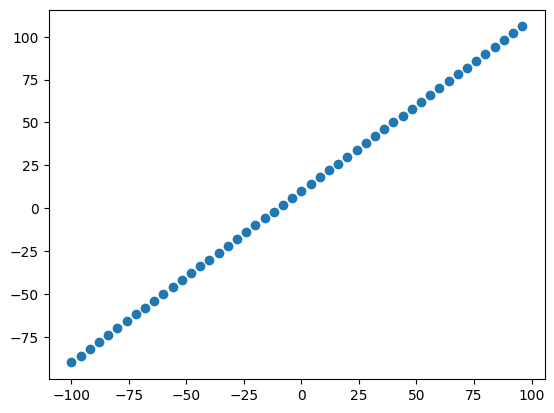

In [24]:
# Visualize data

import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets: 

- **Training set** - model learns from data, typically 70-80% of total data available
- **Validation set** - model is tuned based on this data, 10-15% of available data
- **Test set** - model is evaluated on data to test what it has learned, typically 10-15% of total available data

In [25]:
# Check length of num of samples
len(X)

50

In [26]:
# Split data into test and train sets
X_train = X[:40] # first 40 training samples(80% of total data)
y_train = y[:40]

X_test = X[40:] # last testing samples (20% of total data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing data in newly created training and test sets


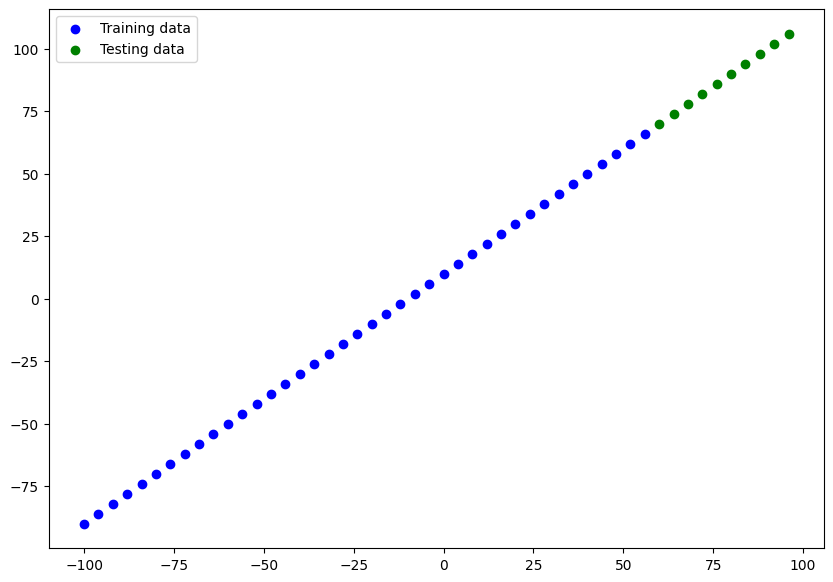

In [27]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data") # model learns on training data
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data") # moedl tested on testing data
# Show legend
plt.legend()

In [28]:
# 1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit model
#model.fit(X_train, y_train, epochs=100) #Fit model only on training

### Visualizing the model

In [30]:
model.summary()

ValueError: ignored

In [31]:
# Create model which builds automatically by defining input_shape arg in first layer
tf.random.set_seed(42)

# 1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # input_shape = 1 b/c both X[0] and y[0] are scalars w/ shape of [1] or 1 number
])

# 2. Compile model
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


- Total params - total # of params in model
- Trainable params - params (patterns) model can update as it trains
- Non-trainable params - params aren't updated during training (typical when importing already learned patterns or params through **transfer learning**)

In [33]:
# Experimenting w/ # of hidden layers and trainable params/total params
tf.random.set_seed(42)

# 1. Create model
model = tf.keras.Sequential([
   tf.keras.layers.Dense(10, input_shape=[1], name = "input_layer"), #input_shape = 1 b/c both X[0] and y[0] are scalars w/ shape of [1] or 1 number
   tf.keras.layers.Dense(1, name="output_layer")
], name = "model_1")

# 2. Compile model
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


For every hidden layer added there are 2 trainable params per layer b/c number of layers * 2 = total params

In [34]:
# Fitting original model to trianing
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
2/2 - 0s - loss: 46.8432 - mae: 46.8432 - 441ms/epoch - 221ms/step
Epoch 2/100
2/2 - 0s - loss: 34.2249 - mae: 34.2249 - 8ms/epoch - 4ms/step
Epoch 3/100
2/2 - 0s - loss: 36.9426 - mae: 36.9426 - 9ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 18.8182 - mae: 18.8182 - 11ms/epoch - 6ms/step
Epoch 5/100
2/2 - 0s - loss: 24.4091 - mae: 24.4091 - 8ms/epoch - 4ms/step
Epoch 6/100
2/2 - 0s - loss: 11.4027 - mae: 11.4027 - 6ms/epoch - 3ms/step
Epoch 7/100
2/2 - 0s - loss: 12.5255 - mae: 12.5255 - 8ms/epoch - 4ms/step
Epoch 8/100
2/2 - 0s - loss: 11.1316 - mae: 11.1316 - 8ms/epoch - 4ms/step
Epoch 9/100
2/2 - 0s - loss: 40.0537 - mae: 40.0537 - 9ms/epoch - 5ms/step
Epoch 10/100
2/2 - 0s - loss: 27.5023 - mae: 27.5023 - 8ms/epoch - 4ms/step
Epoch 11/100
2/2 - 0s - loss: 10.2705 - mae: 10.2705 - 8ms/epoch - 4ms/step
Epoch 12/100
2/2 - 0s - loss: 25.5515 - mae: 25.5515 - 8ms/epoch - 4ms/step
Epoch 13/100
2/2 - 0s - loss: 16.8507 - mae: 16.8507 - 8ms/epoch - 4ms/step
Epoch 14/100
2/2

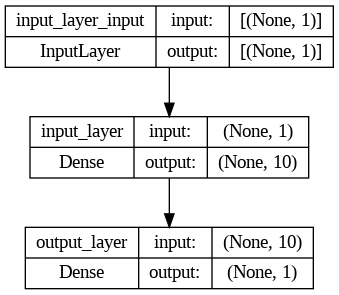

In [35]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [36]:
# Get summary of model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### More model visualization and experimentation

In [37]:
# Experimenting w/ # of hidden layers and trainable params/total params
tf.random.set_seed(42)

# 1. Create model
model = tf.keras.Sequential([
   tf.keras.layers.Dense(10, input_shape=[1], name = "input_layer"), #input_shape = 1 b/c both X[0] and y[0] are scalars w/ shape of [1] or 1 number
   tf.keras.layers.Dense(100, name="hidden_layer1"),
   tf.keras.layers.Dense(10, name="hidden_layer2"),
   tf.keras.layers.Dense(1, name="output_layer1")
], name = "model_2")

# 2. Compile model
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 hidden_layer1 (Dense)       (None, 100)               1100      
                                                                 
 hidden_layer2 (Dense)       (None, 10)                1010      
                                                                 
 output_layer1 (Dense)       (None, 1)                 11        
                                                                 
Total params: 2,141
Trainable params: 2,141
Non-trainable params: 0
_________________________________________________________________


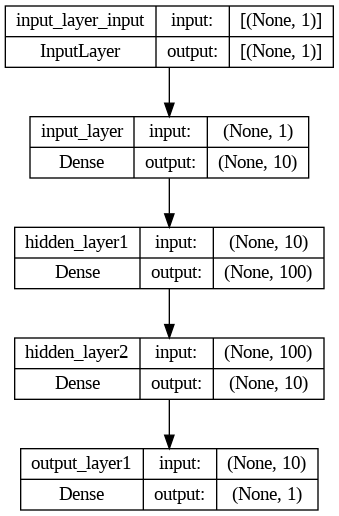

In [38]:
plot_model(model=model, show_shapes=True)

### Visualizing model predictions

(Predictions from the original model from cell 75)

To visualize predictions: plot predictions vs actual values.

'y_test' or 'y_pred' vs 'y_pred' (actual vs model predictions)

In [39]:
# Making predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 100ms/step


array([[ -8.561949],
       [ -9.132744],
       [ -9.703542],
       [-10.274341],
       [-10.845123],
       [-11.415926],
       [-11.986731],
       [-12.557528],
       [-13.128319],
       [-13.699125]], dtype=float32)

In [40]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [41]:
# Creating plot function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):

  """ 
  Plots training data, test data and compares predictions to actual value
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show legend
  plt.legend()

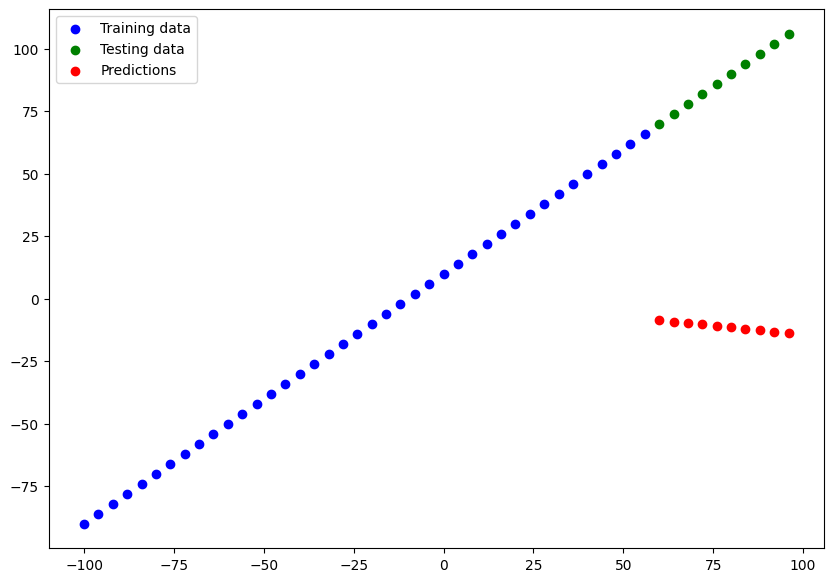

In [42]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred
                 )

### Evaluating model's predictions w/ regression evaluation metrics

Depending on problem, there will be diff evaluation metrics to evaluate model's performance. 

Current problem: regression problem, therefore 2 of the main metrics are:
- MAE - mean absolute error, "On avg how wrong is each model's prediction"
- MSE - mean square error, "square avg errors" (when larger errors are more significant than smaller errors)
- Huber - combination of MSE and MAE (less sensitive to outliers than MSE)

In [43]:
# Evaluate model on test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 378ms/step - loss: 99.1305 - mae: 99.1305


[99.13053894042969, 99.13053894042969]

In [44]:
y_pred

array([[ -8.561949],
       [ -9.132744],
       [ -9.703542],
       [-10.274341],
       [-10.845123],
       [-11.415926],
       [-11.986731],
       [-12.557528],
       [-13.128319],
       [-13.699125]], dtype=float32)

In [45]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [46]:
# Calculate mean absolute error
mae = tf.keras.losses.MAE(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 96.56195 ,  97.132744,  97.703545,  98.27434 ,  98.84512 ,
        99.415924,  99.98673 , 100.557526, 101.12832 , 101.69913 ],
      dtype=float32)>

Doesn't seem to be working right b/c it isn't outputting the same value as above in the evaluate model call (cell 99)

In [47]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ -8.561949],
       [ -9.132744],
       [ -9.703542],
       [-10.274341],
       [-10.845123],
       [-11.415926],
       [-11.986731],
       [-12.557528],
       [-13.128319],
       [-13.699125]], dtype=float32)>

In [48]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Shape of y_test and y_pred tensor isn't equal therefore that is messing w/ calculating the MAE**

In [49]:
# Squeeze shape of y_pred tensor to get its shape to be same as y_test tensor
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ -8.561949,  -9.132744,  -9.703542, -10.274341, -10.845123,
       -11.415926, -11.986731, -12.557528, -13.128319, -13.699125],
      dtype=float32)>

In [50]:
# Calculate mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=99.13054>

In [51]:
# Calculate mean square error
mse = tf.keras.losses.MSE(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=9999.222>

In [52]:
# Make functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

### Running experiments to improve model

How to improve model:
1. Get more data - more examples for model to train on (more opportunities to learn patterns or relationships b/w features and labels).
2. Make model larger (using a more complex model) - more layers or more hidden units per layer.
3. Train longer - give model more time/data to find patterns in data.

3 modelling experiments that are done in section below:
1. 'model_1' - same as original model, 1 layer, trained for 100 epochs.
2. 'model_2' - 2 layers, trained for 100 epochs
3. 'model_3' - 2 layers, trained for 500 epochs
4. 'model_4' - 
5. 'model_5' - 

In [53]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [54]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# 1. Create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit model
model_1.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 49.1648 - mae: 49.1648
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 16.8697 - mae: 16.8697
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 15.9810 - mae: 15.9810
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 8.4801 - mae: 8.4801
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0222 - mae: 11.0222
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 10.1838 - mae: 10.1838
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 9.2018 - mae: 9.2018
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.1412 - mae: 9.1412
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 11.7477 - mae: 11.7477
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 13.6650 - mae: 13.6650
Epoch 11/100
2/2 [==============================] - 0s 9ms

1/1 [==============================] - 0s 60ms/step


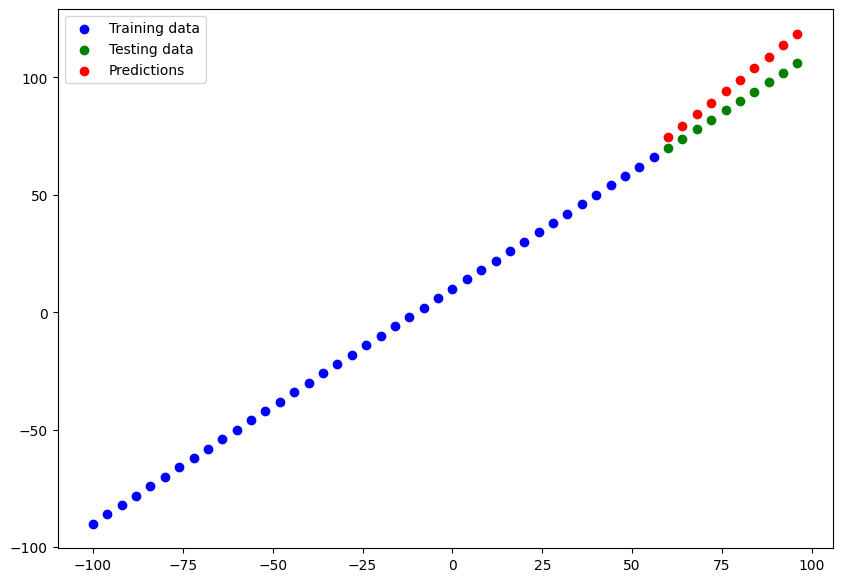

In [55]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [56]:
# Calculate mode_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.590669>,
 <tf.Tensor: shape=(), dtype=float32, numpy=80.29356>)

**model_2**

- 2 dense layers created for 100 epochs

In [57]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit model
model_2.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 28.6440 - mse: 1153.4548
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 25.3283 - mse: 826.3195
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 30.8916 - mse: 1415.5175
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 25.9535 - mse: 982.3679
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 14.2573 - mse: 249.4157
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.3915 - mse: 147.0318
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.4164 - mse: 201.3645
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 10.9565 - mse: 142.7287
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 38.7705 - mse: 2339.4609
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 26.3822 - mse: 978.2631
Epoch 11/100
2/2 [===========================

1/1 [==============================] - 0s 55ms/step


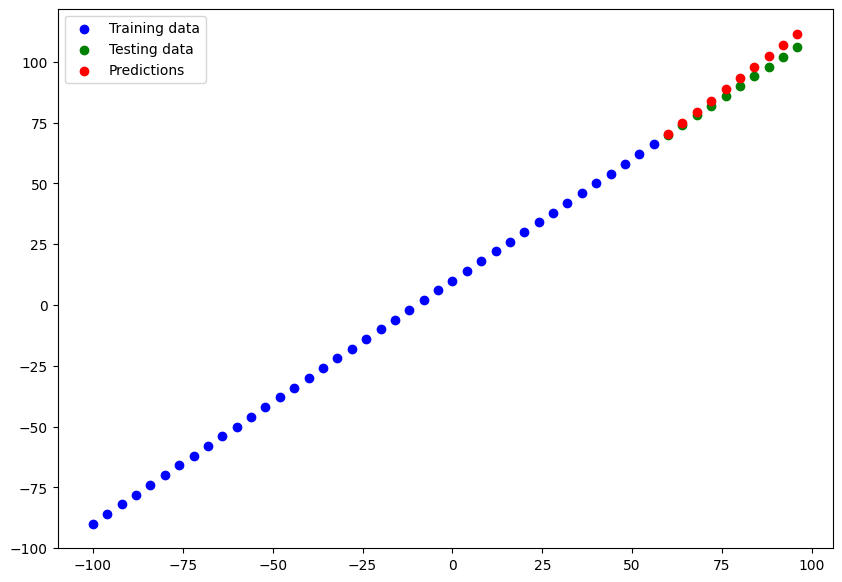

In [58]:
# Make and plot predictions
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [59]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.910614>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.194093>)

**'model_3'**

In [60]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit model
model_3.fit(tf.expand_dims(X_train, -1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 10ms/step - loss: 50.1000 - mae: 50.1000
Epoch 2/500
2/2 [==============================] - 0s 10ms/step - loss: 11.2580 - mae: 11.2580
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 28.7033 - mae: 28.7033
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 14.3769 - mae: 14.3769
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 16.5628 - mae: 16.5628
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 11.2647 - mae: 11.2647
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 12.3274 - mae: 12.3274
Epoch 8/500
2/2 [==============================] - 0s 12ms/step - loss: 10.9954 - mae: 10.9954
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 38.9591 - mae: 38.9591
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 26.5489 - mae: 26.5489
Epoch 11/500
2/2 [==============================] - 0s 6

1/1 [==============================] - 0s 105ms/step


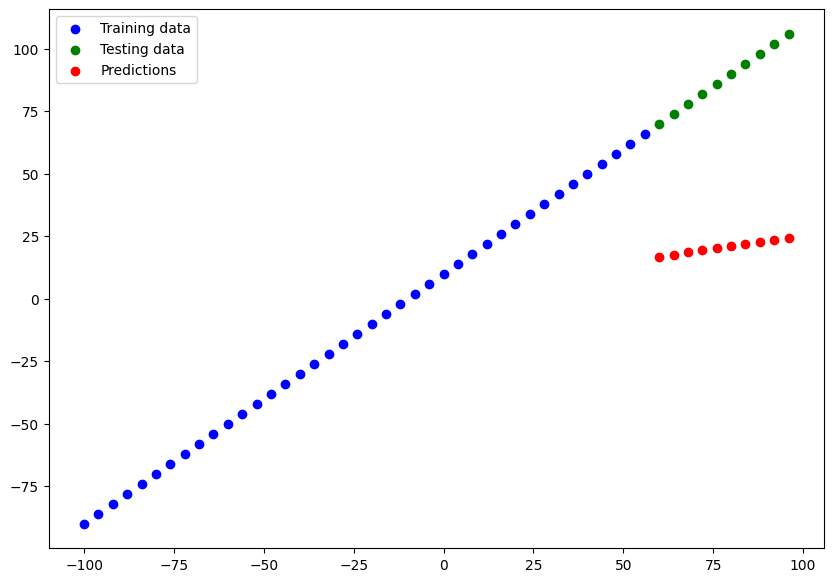

In [61]:
# Make and plot predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [62]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.43214>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4630.632>)

**model_4**

- 3 dense layers created for 100 epochs

In [63]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit model
model_4.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 17ms/step - loss: 33.3147 - mae: 33.3147
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 32.9251 - mae: 32.9251
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 16.8259 - mae: 16.8259
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 12.0313 - mae: 12.0313
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 9.9505 - mae: 9.9505
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 26.8659 - mae: 26.8659
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 16.0425 - mae: 16.0425
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 8.4079 - mae: 8.4079
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 71.8742 - mae: 71.8742
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 20.6393 - mae: 20.6393
Epoch 11/100
2/2 [==============================] - 0s 7ms/st

1/1 [==============================] - 0s 73ms/step


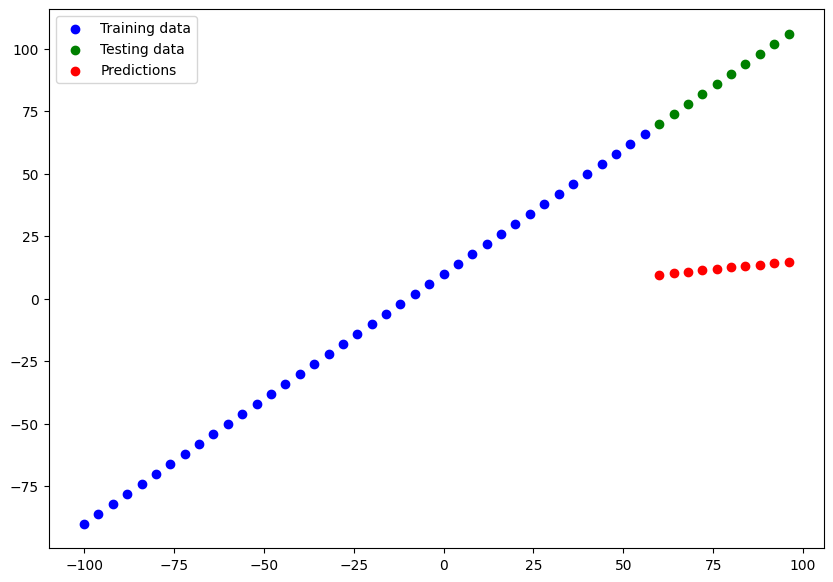

In [64]:
# Make and plot predictions
y_preds_4 = model_4.predict(X_test)
plot_predictions(predictions=y_preds_4)

In [65]:
# Calculate model_4 evaluation metrics
mae_4 = mae(y_test, y_preds_4)
mse_4 = mse(y_test, y_preds_4)
mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=75.76247>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5836.2905>)

**model_5**
2 dense layers for 100 epochs but w/ Adam optimization lr=0.0001

In [66]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["mae"])

# 3. Fit model
model_5.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 10.4440 - mae: 10.4440
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 10.0709 - mae: 10.0709
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 9.7606 - mae: 9.7606
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4384 - mae: 9.4384
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1275 - mae: 9.1275
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 8.7939 - mae: 8.7939
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.5000 - mae: 8.5000
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 8.1573 - mae: 8.1573
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 7.9051 - mae: 7.9051
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 7.6731 - mae: 7.6731
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - loss: 7.

1/1 [==============================] - 0s 53ms/step


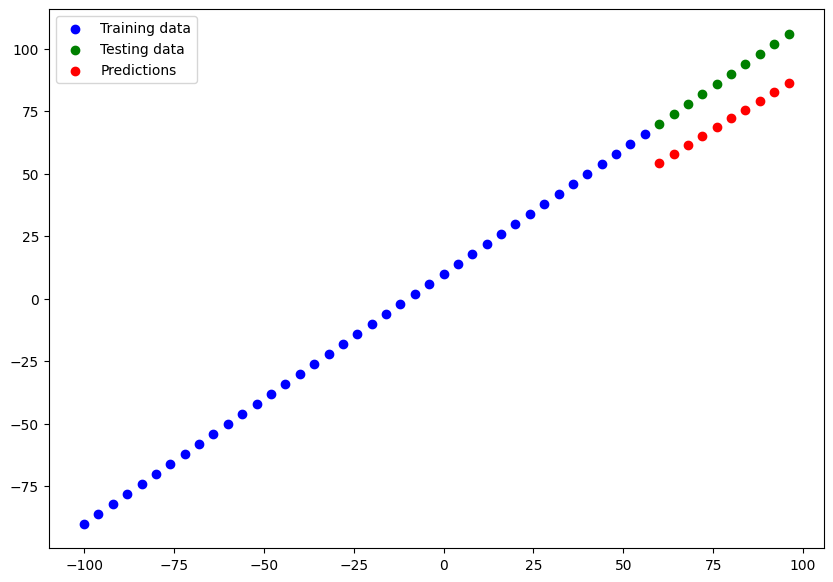

In [67]:
# Make and plot predictions for model_5
y_preds_5 = model_5.predict(X_test)
plot_predictions(predictions=y_preds_5)

In [68]:
# Calculate model_4 evaluation metrics
mae_5 = mae(y_test, y_preds_5)
mse_5 = mse(y_test, y_preds_5)
mae_5, mse_5

(<tf.Tensor: shape=(), dtype=float32, numpy=17.660603>,
 <tf.Tensor: shape=(), dtype=float32, numpy=313.47998>)

## Comparing results of experiments

In [69]:
# Compare model's results using pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()],
                 ["model_4", mae_4.numpy(), mse_4.numpy()],
                 ["model_5", mae_5.numpy(), mse_5.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.590669,80.293556
1,model_2,2.910614,11.194093
2,model_3,67.432137,4630.631836
3,model_4,75.762466,5836.290527
4,model_5,17.660603,313.479980


model_2 performs the best

In [70]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Saving Models

Saving models enables models to be used outside of colab notebooks elsewhere

2 main formats to save model to:
- SavedModel format
- HDF5 format 

In [71]:
# Save model w/ SavedModel format
model_2.save("best_model_SavedModel_format")

In [72]:
# Save model using HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [73]:
# Load in a SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Compare model_2 predictions w/ savedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 87ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [75]:
# Compared mae of loaded model and model_2
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [76]:
# Load in a model using .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [77]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [78]:
# Compare predictions w/ model_2 and loaded h5 model
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 73ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A larger Example


In [79]:
# Import libs
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [80]:
# Read in insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [81]:
# One hot encoding dataframe so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [82]:
# Creating X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [83]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [84]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [85]:
# Creating training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [86]:
# Build neural network like model_2
tf.random.set_seed(42)

# 1. Create model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8647.0674 - mae: 8647.0674
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.2271 - mae: 7886.2271
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7552.0508 - mae: 7552.0508
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7764.5708 - mae: 7764.5708
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7661.6191 - mae: 7661.6191
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7569.7593 - mae: 7569.7593
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7652.3237 - mae: 7652.3237
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7765.7397 - mae: 7765.7397
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7444.5776 - mae: 7444.5776
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7724.3008 - mae: 7724.3008

In [87]:
 insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7014.1436 - mae: 7014.1436


[7014.1435546875, 7014.1435546875]

In [88]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

### Improving the Model

1. Add extra layer w/ more hidden units and used Adam optimizer
2. Train for longer



In [89]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model w/ more layers
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13302.6240 - mae: 13302.6240
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13116.5820 - mae: 13116.5820
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12748.6631 - mae: 12748.6631
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12045.0137 - mae: 12045.0137
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10885.2695 - mae: 10885.2695
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9418.3438 - mae: 9418.3438
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8105.2793 - mae: 8105.2793
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7508.0269 - mae: 7508.0269
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7418.1221 - mae: 7418.1221
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7398.5640 - mae:

In [90]:
# Evaluate model2
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 4726.7725 - mae: 4726.7725


[4726.7724609375, 4726.7724609375]

In [91]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit model
history = insurance_model_3.fit(X_test, y_test, epochs=500, verbose=0)

In [92]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3579.9780 - mae: 3579.9780


[3579.97802734375, 3579.97802734375]

In [93]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7014.1436 - mae: 7014.1436


[7014.1435546875, 7014.1435546875]

Text(0.5, 0, 'epochs')

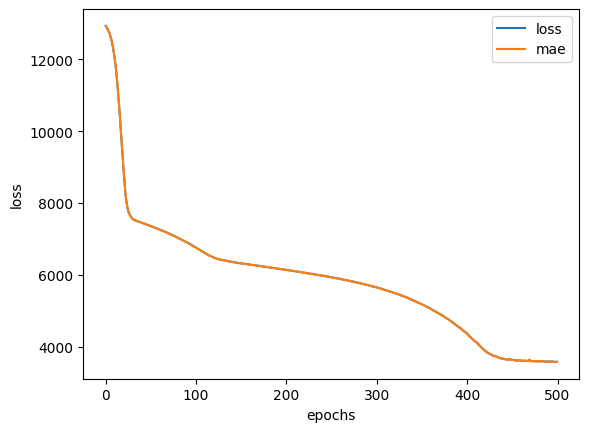

In [94]:
# Plot history (also known as loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalization and standardization)

In terms or scalaing values, neural networks tend to prefer normalization

try both and see which performs better

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare data use Scikit-Learn

In [96]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in columns b/w 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer to training data
ct.fit(X_train)

# Transform training and test data w/ normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test) 

In [97]:
# How data looks
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [98]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [99]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Train a new neural network model on the normalized data

In [100]:
# Build neural network model to fit normalized data

<Axes: ylabel='Frequency'>

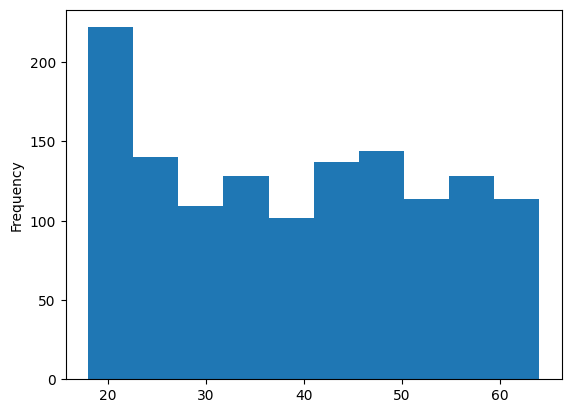

In [101]:
X["age"].plot(kind="hist")
# range roughly from 20 to 60

<Axes: ylabel='Frequency'>

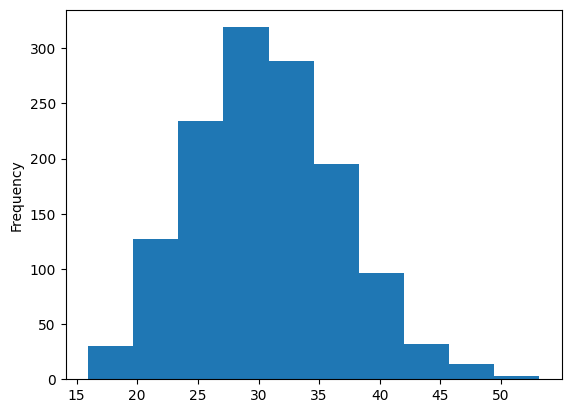

In [102]:
X["bmi"].plot(kind="hist")
# range from roughly 15 to 55

In [103]:
X["children"].value_counts()
# range from 0 to 5

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64